# Chapter 4 - 행렬, 파트 1: 행렬과 행렬의 기본 연산

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

## 4-1. 행렬 원소 인덱싱

In [2]:
matrix = np.arange(12).reshape(3, 4)
matrix

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [3]:
print("The matrix element at index (2, 4) is", matrix[1, 3])

The matrix element at index (2, 4) is 7


## 4-2. 행렬을 잘라서 부분 행렬 얻기

In [4]:
c = np.arange(100).reshape(10, 10)
c

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [5]:
c1 = c[:5, :5]
c1

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

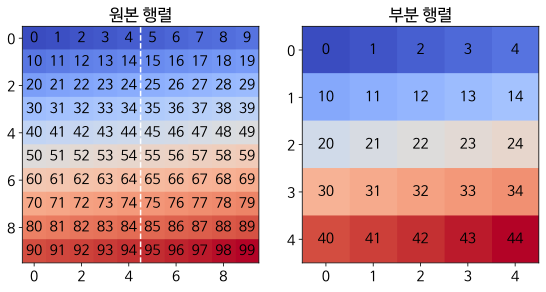

In [6]:
# 서브플롯 설정 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 첫 번째 subplot
axes[0].imshow(c, cmap='coolwarm')  # 첫 번째 히트맵
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        # 첫 번째 subplot에 텍스트 추가
        axes[0].text(j, i, c[i, j], ha='center', va='center', color='black') 

# 가운데 수직 점선 추가 (첫 번째 subplot)
axes[0].axvline(x=c.shape[1] / 2 - 0.5, color='white', linestyle='--')

# 첫 번째 subplot 제목 추가
axes[0].set_title("원본 행렬")

# 두 번째 subplot
axes[1].imshow(c1, cmap='coolwarm')  # 두 번째 히트맵
for i in range(c1.shape[0]):
    for j in range(c1.shape[1]):
        # 두 번째 subplot에 텍스트 추가
        axes[1].text(j, i, c1[i, j], ha='center', va='center', color='black') 

# 두 번째 subplot 제목 추가
axes[1].set_title("부분 행렬")

# subplot 간 간격 조정
plt.tight_layout()

plt.show()


## 4-6. for loop을 통해 행렬 곱셈 코딩한 후, numpy @ 연산자를 사용해 결과 비교

In [7]:
# 행렬 곱셈을 위해, c2, c3 선언
c2 = c[:3, :3]
c2

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [8]:
c3 = c[-3:, -2:]
c3

array([[78, 79],
       [88, 89],
       [98, 99]])

In [9]:
c3[0]

array([78, 79])

In [10]:
# for loop을 사용한 행렬 곱셈 코딩
def matrix_multiplication_using_for_loop(matrix1, matrix2):
    # 행렬은 (M X N) @ (N X K) = (M X K) 형태가 되기 때문에, 
    # K에 해당하는 matrix2[0]의 갯수 만큼 반환할 matrix의 열을 만들어 준다
    matrix = [len(matrix2[0]) * [0] for _ in range(len(matrix1))]

    # for문을 통해, 0으로 되어 있는 matrix의 값들을 각각 채워 넣는다
    # i : 비어 있는 matrix의 행, j : 비어 있는 matrix의 열
    for i in range(len(matrix)):
        print("i:", i)
        for j in range(len(matrix[i])):
            print("j:", j)
            # k는 비어 있는 matrix 행렬의 열의 갯수만큼 반복
            for k in range(len(matrix1[i])):
                print("k:", k)
                matrix[i][j] += (matrix1[i][k] * matrix2[k][j])
                print("결과", matrix[i][j])
                
    
    return matrix

In [11]:
matrix_multiplication_using_for_loop(c2, c3)

i: 0
j: 0
k: 0
결과 0
k: 1
결과 88
k: 2
결과 284
j: 1
k: 0
결과 0
k: 1
결과 89
k: 2
결과 287
i: 1
j: 0
k: 0
결과 780
k: 1
결과 1748
k: 2
결과 2924
j: 1
k: 0
결과 790
k: 1
결과 1769
k: 2
결과 2957
i: 2
j: 0
k: 0
결과 1560
k: 1
결과 3408
k: 2
결과 5564
j: 1
k: 0
결과 1580
k: 1
결과 3449
k: 2
결과 5627


[[284, 287], [2924, 2957], [5564, 5627]]

In [12]:
# numpy @ 연산자를 사용 했을 때와 비교
c2 @ c3

array([[ 284,  287],
       [2924, 2957],
       [5564, 5627]])

## 4-8. 행렬의 대칭 여부를 퐉인하는 하이썬 함수 작성, 적절한 허용 오차를 사용해서 동일성 테스트

In [13]:
# 대칭행렬은 자신의 전치 행렬과 같다 (At = A면, A는 대칭)
# np.allclose 함수 사용
# https://numpy.org/doc/stable/reference/generated/numpy.allclose.html

def tf_symmetric(matrix):
    transposed = matrix.T
    allclose = np.allclose(matrix, transposed)
    return allclose

In [14]:
c2

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [15]:
# 비대칭 행렬 넣어본다
tf_symmetric(np.array(c2))

False

In [16]:
# 대칭 행렬 넣어본다
tf_symmetric(np.array([[1, 3], [3, 5]]))

True

In [31]:
matrix1 = np.array([[ 0,  1,  2],
                    [10, 11, 12],
                    [20, 21, 22]])
matrix1

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [32]:
matrix2 = np.array([[1,  2],
                    [2, 1]])

In [33]:
matrix2

array([[1, 2],
       [2, 1]])

In [34]:
np.allclose(matrix1, matrix1.T)

False

In [35]:
np.allclose(matrix2, matrix2.T)

True

## 4-9. 비대칭 사각 행렬로부터 대칭 행렬을 만드는 덧셈 방법
- 행렬을 자신의 전치로 평균화

In [17]:
def make_and_check_symmetric(matrix):
    # 전치 행렬 구하기
    transpose = matrix.T
    # 평균화
    symmetric = (matrix + transpose) / 2
    print("덧셈 방법을 통한 행렬: \n", symmetric)
    # tf_symmetric 함수를 통해 결과가 실제로 대칭인지 확인
    return tf_symmetric(symmetric)

In [18]:
c2

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [19]:
# 행렬 c2를 덧셈 방법으로 대칭 행렬로 만들고 대칭 여부 확인
make_and_check_symmetric(c2)

덧셈 방법을 통한 행렬: 
 [[ 0.   5.5 11. ]
 [ 5.5 11.  16.5]
 [11.  16.5 22. ]]


True